# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [0]:
#!pip install seaborn --upgrade

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

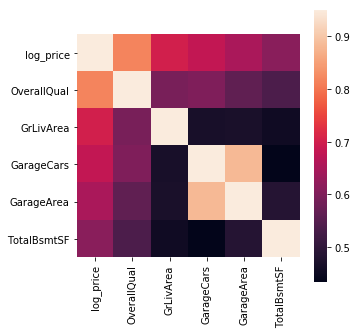

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv")
df['log_price'] = np.log(df['SalePrice'])
df = df[['log_price','OverallQual', 'GrLivArea','GarageCars', 'GarageArea','TotalBsmtSF',]]
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(correlation_matrix, vmax=.95, square=True);

In [3]:
data = df[["OverallQual","GrLivArea","log_price"]]
print(data.head())

   OverallQual  GrLivArea  log_price
0            7       1710  12.247694
1            6       1262  12.109011
2            7       1786  12.317167
3            7       1717  11.849398
4            8       2198  12.429216


## Linear Regression with Gradient Descent

Linear regression, an approach to modeling the relationship between a dependent variable and one or more independent variables (if there's one independent variable then it's called simple linear regression, and if there's more than one independent variable then it's called multiple linear regression).

Try to create a *linear model of the data X*, using some number of *parameters theta,* that describes the variance of the data such so we can accurately predict what the outcome y would be without actually knowing what y is by inputting a new data point that's not in X. 

In [4]:
#### This is the cost function.###
# It evaluates the quality of the model by calculating the error between our
# model's parameters (theta) and the actual values (Y). This determines it's precision. 

def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

# Column of 1's needed to make the dataset work right. 
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-2] # Only doing the first column first. 
y = data.iloc[:,cols-1:cols]
 
# convert from dataframe to numpy matrices and initialize with empty theta. 
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

#check the shapes
X.shape, theta.shape, y.shape

((1460, 2), (1, 2), (1460, 1))

In [5]:
# Just testing that the function works 
# (theta is set to zero which obviously isn't the answer.
computeCost(X, y, theta)

72.36862628931299

In [0]:
# Gradient Descent function. Each iteration computes the gradient of the error
# term and decides which direction to move in. We calculate the changes we need 
# to make to our model's parameters and make it more accurate. 

def gradientDescent (X, y, theta, alpha, iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = int(theta.ravel().shape[1])
  cost = np.zeros(iters)
  
  for i in range(iters):
    error = (X * theta.T) - y
    
    for j in range (parameters):
      term = np.multiply(error, X[:,j])
      temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
    
    theta = temp
    cost[i] = computeCost(X, y, theta)
    
  return theta, cost

In [25]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 100

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
print(f'Output of gradient descent:  {g}')

print(f"Cost Function Output: {computeCost(X,y,g)}")

Output of gradient descent:  [[0.7676426  1.76873707]]
Cost Function Output: 2.381241195257083


Text(0.5, 1.0, 'Error vs. Training Epoch')

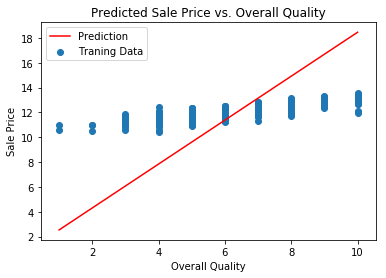

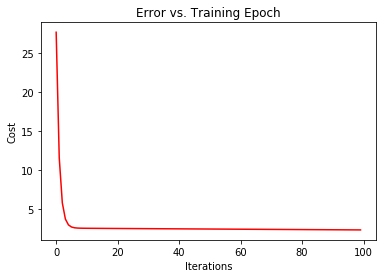

In [26]:
# Plot the trained model's predicted line vs the train data. 
x = np.linspace(data.OverallQual.min(), data.OverallQual.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.OverallQual, data.log_price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Overall Quality')
ax.set_ylabel('Sale Price')
ax.set_title('Predicted Sale Price vs. Overall Quality')

# Plot training curve
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### Now lets try with some more iterations! 


## Nailed it! 



Output of gradient descent:  [[10.49727772  0.24963703]]
Cost Function Output: 0.026671473972374495


Text(0.5, 1.0, 'Error vs. Training Epoch')

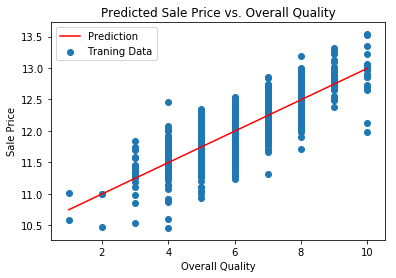

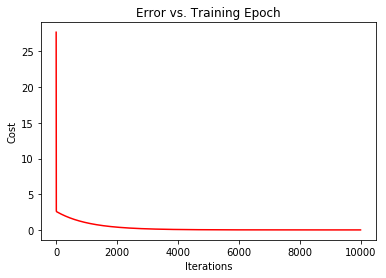

In [28]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 10000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
print(f'Output of gradient descent:  {g}')

print(f"Cost Function Output: {computeCost(X,y,g)}")

# Plot the trained model's predicted line vs the train data.
x = np.linspace(data.OverallQual.min(), data.OverallQual.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.OverallQual, data.log_price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Overall Quality')
ax.set_ylabel('Sale Price')
ax.set_title('Predicted Sale Price vs. Overall Quality')

# Plot training curve
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Multiple Regession with Gradient Descent

In [31]:
# Same data 
data = df[["OverallQual","GrLivArea","log_price"]]

# Feature Normalization - Standardize the data to ensure evenly weighted data.
# Centers the means on zero. Each value on a scale of 1 standard deviation. 
data2 = (data - data.mean()) / data.std()
data2.describe()

,OverallQual,GrLivArea,log_price
count,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.070681e-16,-1.411352e-16,2.477653e-14
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.687150e+00,-2.248350e+00,-3.914887e+00
25%,-7.948791e-01,-7.344969e-01,-6.232379e-01
50%,-7.181151e-02,-9.793648e-02,-5.644090e-02
75%,6.512561e-01,4.972332e-01,6.250575e-01
max,2.820459e+00,7.852884e+00,3.781237e+00


## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)